## **Image Data load & pre processing**


In [39]:
import os
import torch
import argparse
import numpy as np
import torchvision

import matplotlib.pyplot as plt


"""argparse :argparse란 프로그램에 필요한 인자를 사용자 친화적인 명령행 인터페이스로 쉽게 작성하도록 돕는 라이브러리 이다. 
즉, command 창에서 프로그램 내의 인자를 조절하게끔 도와준다"""

'argparse :argparse란 프로그램에 필요한 인자를 사용자 친화적인 명령행 인터페이스로 쉽게 작성하도록 돕는 라이브러리 이다. \n즉, command 창에서 프로그램 내의 인자를 조절하게끔 도와준다'

In [10]:
from torch.utils.data.dataset import T
train_data = torchvision.datasets.MNIST(root = './data',
                                        train =True, download=True, 
                                        transform = torchvision.transforms.ToTensor())
test_data = torchvision.datasets.MNIST(root = './data',
                                        train =False, download=True, 
                                        transform = torchvision.transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_data, batch_size = 32, shuffle =True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 32, shuffle =False)

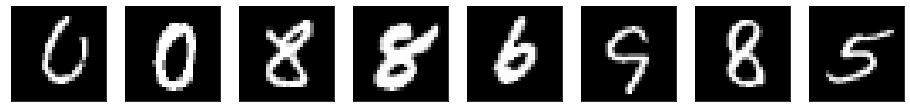

In [40]:
#show MNIST Image
def show_mnist():
  for images, _ in train_loader:
    images_to_show = images.squeeze().numpy()
    fig = plt.figure(figsize = (16,2))
    for i in range(8):
      fig.add_subplot(1,8,i+1)
      plt.imshow(images_to_show[i], cmap = 'gray')
      plt.xticks([])
      plt.yticks([])
    fig.show()
    break
show_mnist()

In [ ]:
# 서로 다른 사이즈의 이미지를 받아오기 위해서는 전처리를 해줘야 합니다.
transform = torchvision.transforns.Compose([
                    torchvision.transforms.Resize((224,224)),
                    torchvision.tranforms.ToTensor()
])
path = ''
train_data = torchvision.datasets.ImageFolder(path,transform=transform)                       
train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=False)

In [ ]:
# 큰 사진의 경우 이를 cropping해서 사용한다면 데이터 증대의 효과를 누릴 수 있습니다.
#RandomReizeCrop :  crop has a random area (H * W) and a random aspect ratio. 
transform_crop = torchvision.transform.Compose([
                        torchvision.transforms.RandomResizedCrop((224,224)),
                        torchvision.transforms.ToTensor()
])
path = ''
train_data = torchvision.datasets.ImageFolder(path,transform=transform)                       
train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=False)